In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


In [5]:
c = cast #merge on columns
c.merge(release_dates, on = ('title','year'))

,title,year,name,type,character,n,country,date
0,Suuri illusioni,1985,Homo $,actor,Guests,22,Finland,1985-11-01
1,Suuri illusioni,1985,Jack Helen Brut,actor,Guests,21,Finland,1985-11-01
2,Suuri illusioni,1985,Risto Heikinheimo,actor,Discussing Guest,NaN,Finland,1985-11-01
3,Suuri illusioni,1985,Erkki Hopf,actor,Young German,17,Finland,1985-11-01
4,Suuri illusioni,1985,Ola Johansson,actor,German Sailor,12,Finland,1985-11-01
5,Suuri illusioni,1985,Martti Katajisto,actor,Doctor J?der,8,Finland,1985-11-01
6,Suuri illusioni,1985,Tony Laafou,actor,Sailor with Cards,11,Finland,1985-11-01
7,Suuri illusioni,1985,Uula Laakso,actor,Dimitri,15,Finland,1985-11-01
8,Suuri illusioni,1985,Lars Lindberg,actor,Sailor,13,Finland,1985-11-01
9,Suuri illusioni,1985,Fran?ois Michel,actor,Hotel Porter,19,Finland,1985-11-01


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

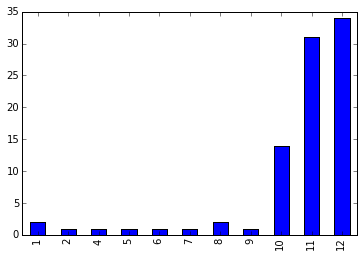

In [30]:
r = release_dates
r = r[r.title.str.contains("Christmas")]
r = r[r.country == "USA"]
r = r.date.dt.month.value_counts().sort_index().plot('bar')
r

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

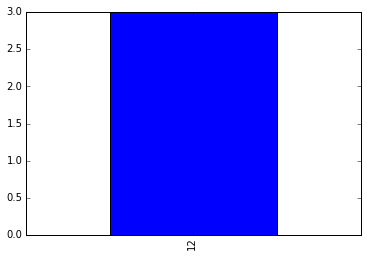

In [40]:
r = release_dates
r = r[(r.title.str.startswith("The Hobbit")) & (r.country == "USA")]
r = r.date.dt.month.value_counts().sort_index().plot('bar')
r

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

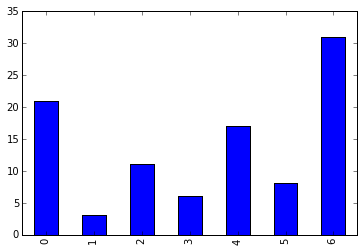

In [46]:
r = release_dates
r = r[(r.title.str.contains("Romance")) & (r.country == "USA")]
(r.date.dt.dayofweek.value_counts()).sort_index().plot('bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

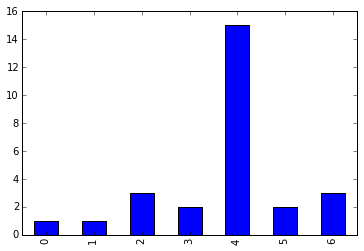

In [49]:
r = release_dates
r = r[(r.title.str.contains("Action"))&(r.country == "USA")]
(r.date.dt.dayofweek.value_counts()).sort_index().plot('bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

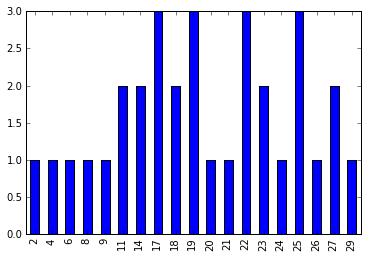

In [64]:
r = release_dates
r = r[r.country == "USA"]
c = cast 
c = c[(c.name == "Judi Dench") & (c.year//10 >= 199)]
c = c.merge(r).sort('date')
(c.date.dt.day.value_counts()).sort_index().plot('bar')

### In which months do films with Judi Dench tend to be released in the USA?

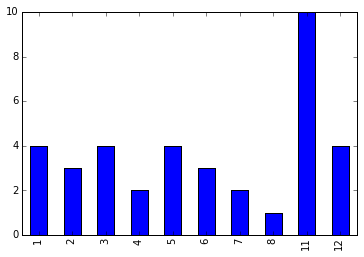

In [67]:
r = release_dates
r = r[r.country == "USA"]
c = cast
c = c[c.name == "Judi Dench"]
c = c.merge(r)
(c.date.dt.month.value_counts()).sort_index().plot('bar')

### In which months do films with Tom Cruise tend to be released in the USA?

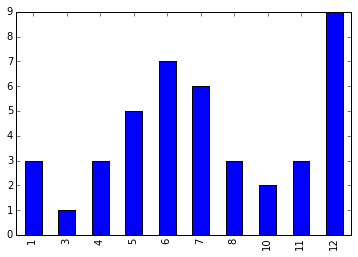

In [72]:
r = release_dates
r = r[r.country == "USA"]
c = cast
c = c[c.name == "Tom Cruise"]
c = c.merge(r)
(c.date.dt.month.value_counts()).sort_index().plot('bar')